# DECISION TREE CLASSIFIER

# IRIS DATASET

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import pylab
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.metrics import accuracy_score, confusion_matrix,  f1_score
from sklearn.model_selection import train_test_split,GridSearchCV

In [60]:
df=pd.read_csv("iris.csv")

In [61]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [62]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [64]:
df.isnull().sum()/len(df)*100

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

In [65]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [66]:
df.duplicated().sum()/len(df)*100

0.0

In [67]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# label encoding for target feature

In [68]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [69]:
df['Species']=df['Species'].replace({'Iris-virginica':0,'Iris-versicolor':1,'Iris-setosa':2})

In [70]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,2
1,2,4.9,3.0,1.4,0.2,2
2,3,4.7,3.2,1.3,0.2,2
3,4,4.6,3.1,1.5,0.2,2
4,5,5.0,3.6,1.4,0.2,2


In [71]:
df.drop(columns=['Id'],inplace=True)

In [72]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


# Segregate x and y

In [73]:
x=df.drop(columns=['Species'])
y=df['Species']

# split into train and test

In [74]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [75]:
DT= DecisionTreeClassifier()

In [76]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [77]:
y_pred=DT.predict(x_test)

In [78]:
y_pred_train=DT.predict(x_train)

In [79]:
accuracy_score(y_pred,y_test)

1.0

In [80]:
accuracy_score(y_pred_train,y_train)

1.0

In [81]:
cm=confusion_matrix(y_pred,y_test)

<AxesSubplot:>

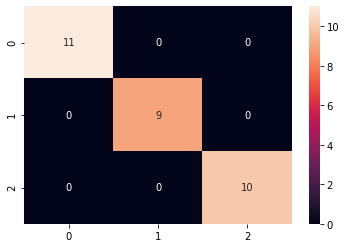

In [82]:
sns.heatmap(cm,annot=True)

In [83]:
f1_score(y_pred,y_test,average='weighted')

1.0

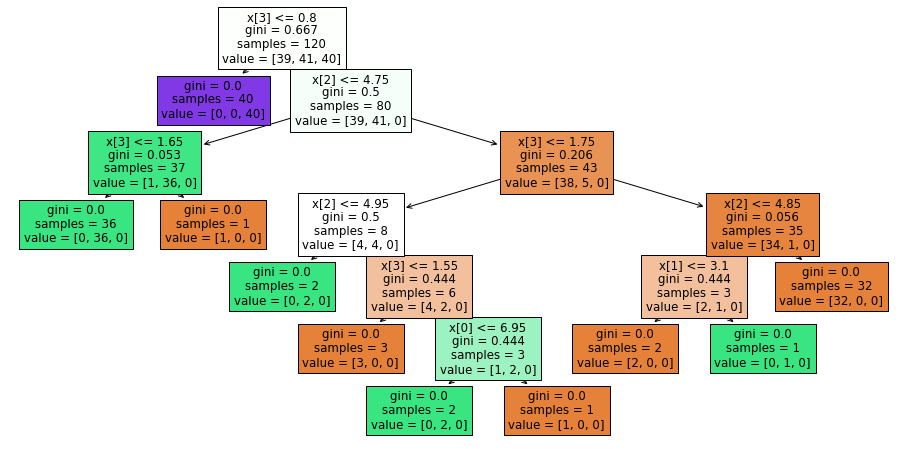

In [84]:
plt.figure(figsize=(16,8))
tree.plot_tree(DT,filled=True)
plt.show()

In [85]:
# max_dept
# min_sample_split
# min_sample_leaf     depend on overfitting

# Hyperprarmeter tunning for Decison Tree Classifier

In [86]:
dt=DecisionTreeClassifier()

In [87]:
grid_param ={'criterion': ['gini', 'entropy'], 
            'max_depth': range(2,32,1), 
            'min_samples_leaf': range(1,10,1),
            'min_samples_split': range(2,10,1),
            'splitter': ['best', 'random']}

In [89]:
grid_search= GridSearchCV(estimator=dt,param_grid=grid_param,cv=5,n_jobs =-1)

In [90]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [91]:
grid_search.best_score_

0.9833333333333332

In [92]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 19,
 'min_samples_leaf': 4,
 'min_samples_split': 9,
 'splitter': 'random'}

In [94]:
treemodel= DecisionTreeClassifier(criterion= 'gini',
 max_depth= 19,
 min_samples_leaf= 4,
 min_samples_split= 9,
 splitter= 'random')

In [95]:
treemodel.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=19, min_samples_leaf=4, min_samples_split=9,
                       splitter='random')

In [96]:
y_pred=treemodel.predict(x_test)

In [98]:
y_pred_train=treemodel.predict(x_train)

In [99]:
accuracy_score(y_pred,y_test)

1.0

In [100]:
accuracy_score(y_pred_train,y_train)

0.9666666666666667

In [101]:
cm=confusion_matrix(y_pred,y_test)

<AxesSubplot:>

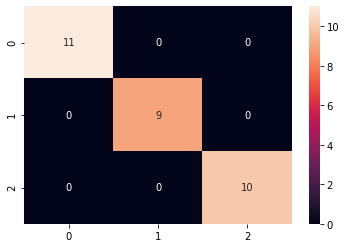

In [102]:
sns.heatmap(cm,annot=True)